<h1> DS200A Computer Vision Assignment</h1>

<h2>  Part Two: Exploratory data analysis and feature extraction. </h2>	


<h5> In this section, Compute at least 15 such image features (a method for each), including the following (NOTE: At least 10 of these must be scalar features and 2 matrix-based features): (i) image size, (ii) average of the red-channel intensity, (iii) aspectratio. This will require significant explatoratory research and data analysis. The first one is already implemented for you, and the next two are pre-specified. Additional requirements specfied in pdf. </h5>

In [180]:
# Scalar feature
def ft0(image):
    # Returns the pixel size of the image
    return image.size

# Scalar feature
def ft1(image):
    # Returns the average of the red-channel pictures for the images
    if image.ndim != 3:
        return 0
    return np.mean(image[:, :, 0])

# Scalar feature
def ft2(image):
    # Returns the aspect ratio of the image
    height, width = image.shape[:2]
    return width / height

# Scalar feature
def ft3(image):
    # Returns the average of the blue-channel pictures for the images
    if image.ndim != 3:
        return 0
    return np.mean(image[:, :, 2])

 We expect all external sources sited, and significant indication of EDA. 

In this part, we focus on the learning set. Let's load the data first.

In [159]:
import pandas as pd
import numpy as np

learning = pd.read_pickle("train.pkl")
print(learning.shape)
learning.head()

(1501, 2)


,Pictures,Encodings
0,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0
1,"[[[88, 56, 17], [95, 63, 24], [101, 69, 30], [...",0
2,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0
3,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0
4,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0


Next, let's try to display 3 of the learning set images.

Label = penguin
Label = gorilla
Label = dolphin


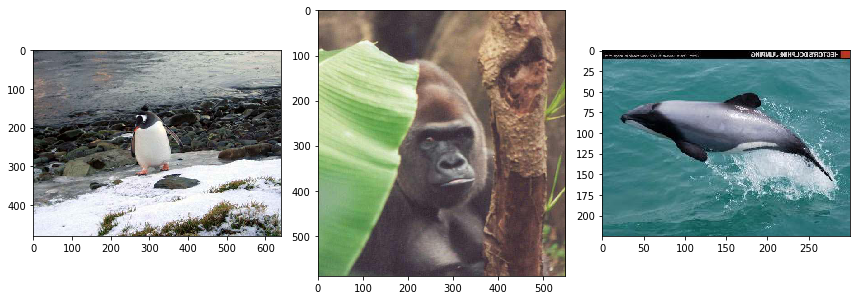

In [160]:
import skimage
from matplotlib import pyplot as plt

labels = pd.read_csv("labels.csv", index_col=0)

sample = learning.sample(3, random_state=42)
fig=plt.figure(figsize=(12, 7))
for i in range(len(sample)):
    row = sample.iloc[i]
    fig.add_subplot(1, 3, i + 1)
    skimage.io.imshow(row["Pictures"])
    print('Label = ' + labels.iloc[row["Encodings"]].labels)
plt.show()

Alright, everything seems working. We have an image of a penguin, a gorilla, and a dolphin.

<h4> Graphs </h4>

First, let's investigate the size of the images across different classes.

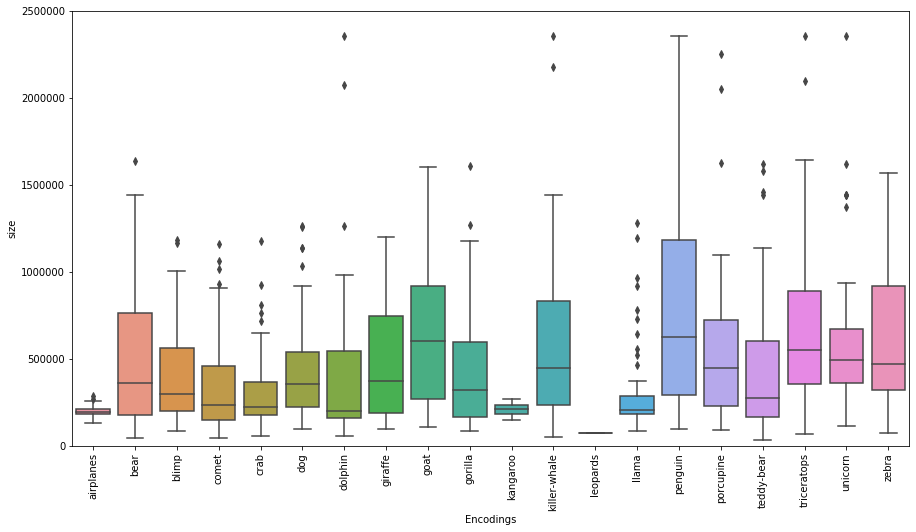

In [161]:
import seaborn as sns

train_cpy = learning.copy()
train_cpy["size"] = learning["Pictures"].apply(ft0)

plt.figure(figsize=(15,8))
ax = sns.boxplot(x="Encodings", y="size", data=train_cpy)
ax.set(ylim=(0, 2.5e6))
ax.set_xticklabels(labels['labels'], rotation=90);

Ignoring the outliers, we notice that almost all leopards have a small image size. The same goes for airplanes, kangaroo, and llama. By contrast, penguin has much variance in image sizes with a rather high the median value. In general, we observe a great variety of image size distributions for different classes, so it might be a feature that can help us differentiate between classes. However, we don't observe a particular, explainable pattern here.

Second, let's examine the average red-channel intensity.

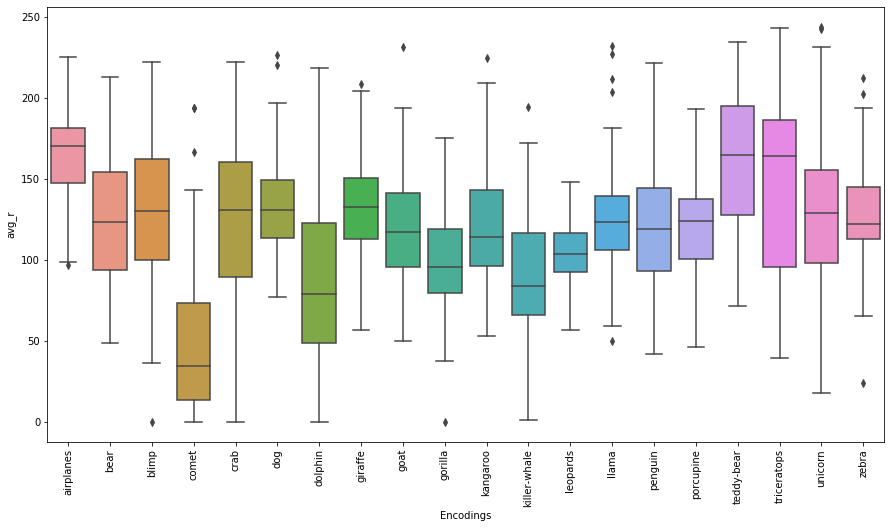

In [162]:
train_cpy["avg_r"] = learning["Pictures"].apply(ft1)
train_cpy.head()

plt.figure(figsize=(15,8))
ax = sns.boxplot(x="Encodings", y="avg_r", data=train_cpy)
ax.set_xticklabels(labels['labels'], rotation=90);

Interestingly, commet images exhibit low average red intensity. This should not be a big surprise because commet pictures we see are usually in a black background. Teddy bear and triceratops have high red intensity, probably due to their brown color. However, it is very interesting that airplanes have high red intensity. Let's look at some airplane pictures to understand why.

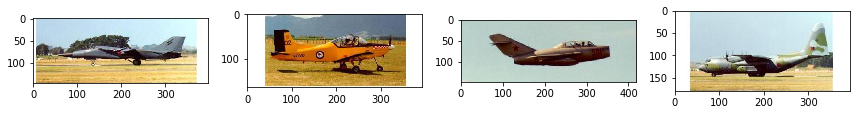

In [163]:
airplane_sample = learning[learning["Encodings"] == list(labels["labels"]).index("airplanes")].sample(4, random_state=42)
fig=plt.figure(figsize=(12, 7))
for i in range(len(airplane_sample)):
    row = airplane_sample.iloc[i]
    fig.add_subplot(1, len(airplane_sample), i + 1)
    skimage.io.imshow(row["Pictures"])
plt.show()

We see that many airplane pictures have the bright sky as background. This may be the reason why airplane pictures have high red intensity because its background is almost as bright as white. Anyways, red intensity may also be a helpful feature for identifying classes like commets and airplanes.

Third, let's examine the aspect ratio feature.

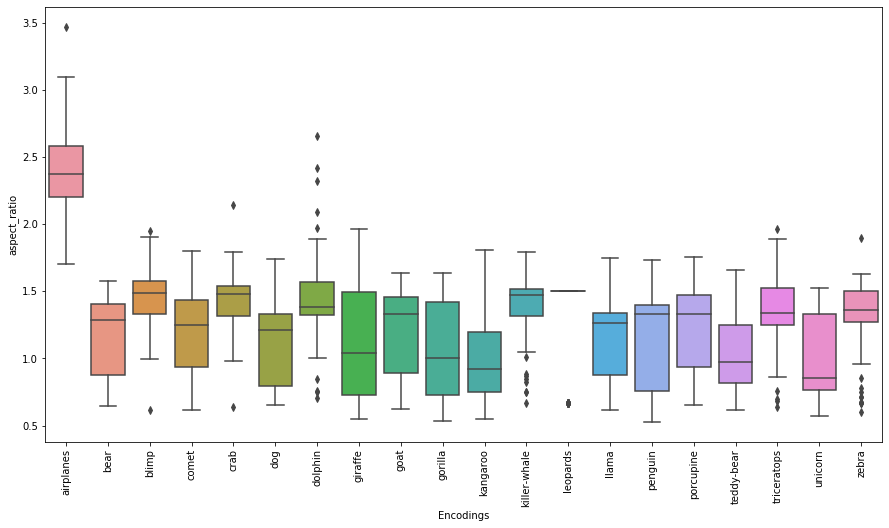

In [173]:
train_cpy["aspect_ratio"] = learning["Pictures"].apply(ft2)
train_cpy.head()

plt.figure(figsize=(15,8))
ax = sns.boxplot(x="Encodings", y="aspect_ratio", data=train_cpy)
ax.set_xticklabels(labels['labels'], rotation=90);

Airplane images have a very high aspect ratio. Judging from our sample images, most airplane pictures are flat, because that fits with the position in which the airplane flys. Sensibly, airplanes seldome fly vertically. Therefore, aspect ratio is a good feature for identifying airplanes.

Let's continue with color intensities. Let's try the average blue-channel intensity.

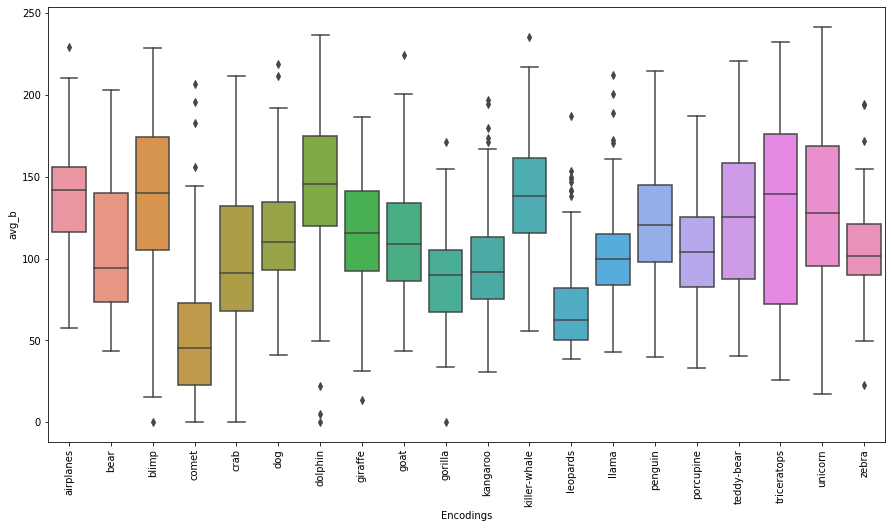

In [182]:
train_cpy["avg_b"] = learning["Pictures"].apply(ft3)
train_cpy.head()

plt.figure(figsize=(15,8))
ax = sns.boxplot(x="Encodings", y="avg_b", data=train_cpy)
ax.set_xticklabels(labels['labels'], rotation=90);

The box plot looks quite different from that of average red intensity. Specifically, airplanes, blimp, dolphin, and killer-whale stand out. It's not too much of a surprise, since all these categories are associated with water or sky, which are predominantly blue. Therefore, it could count as a useful feature.

Now, let's try using Bag of Visual Words (BoVW).

In [260]:
import cv2
from skimage import io

pic = learning.sample(1, random_state=127)["Pictures"].iloc[0]
orb = cv2.ORB_create()
kp = orb.detect(pic, None)
kp, des = orb.compute(pic, kp)
print(type(des))
# fast = cv2.FastFeatureDetector_create()
# kp = fast.detect(pic, None)
# img2 = cv2.drawKeypoints(pic, kp, outImage=np.array([]), color=(0, 0, 255))
# io.imshow(img2);

<class 'numpy.ndarray'>


<h4> Sources </h4>

<h4> DataFrame Creation </h4>

In [2]:
def feature_frame(df):
    return df
    #Returns data-frame with all the features now inside, and calculated


In [3]:
feature_frame(data_from_nb1)

NameError: name 'starting_data' is not defined